In [1]:
import time
!pip install -q pyomo
#Below snip of code install the GLPK solver into current python session
!apt-get install -y -qq glpk-utils
from pyomo.environ import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

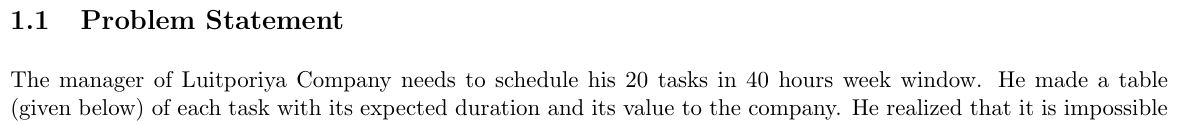

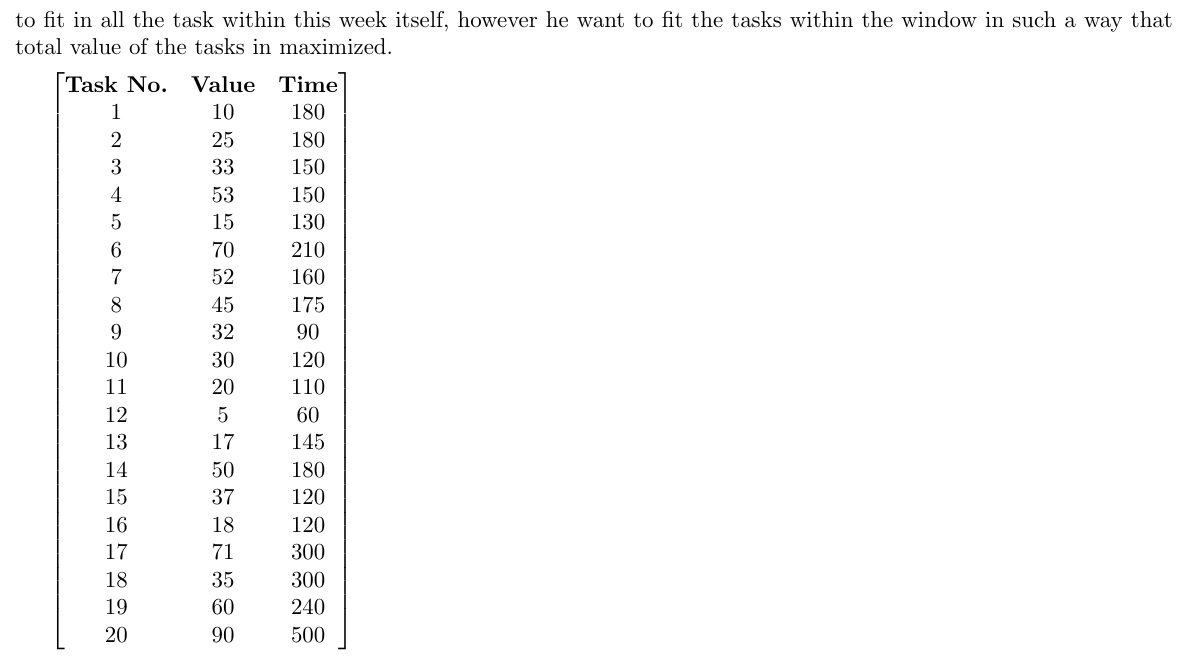

In [2]:
value = [10,25,33,53,15,70,52,45,32,30,20,5 ,17,50,37,18,71,35,60,90]
cost = [180,180,150,150,130,210,160,175,90 ,120,110,60 ,145,180,120,120,300,300,240,500]


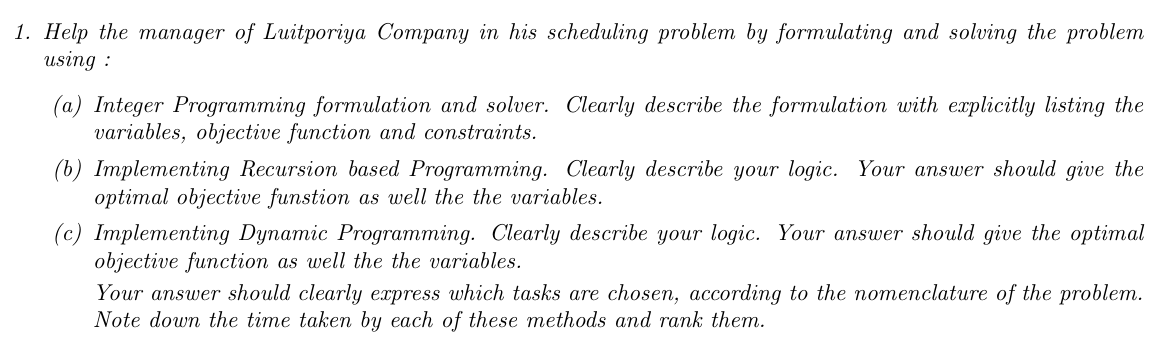

a) We first create the Integer Programming formulation for the problem:
We want to choose tasks where each task has a certain value. We want to maximize the values of tasks choosen such that we don't exceed the total time of 40 hrs a week for the choosen tasks.

**Variables:**

Let $x_i$ be the variable defining tasks choosen or not, hence

$x_i \begin{cases}
1 & \text{if $i^{th}$ task is choosen} \\
0 & \text{otherwise}
\end{cases}
$

**Objective Function:**

We need to maximize the value of tasks choosen:

\begin{align*}
\max_{x_i \in (0,1)} ( \sum_{i=1}^{20} v_ix_i)
\end{align*}

Here $v_i$ is the value of task $x_i$.


**Constraints:**
We try to be in the bounds of 40hrs a week, which is 2400 minutes.
We denote the time of task $i$ by $t_i$, then constraint becomes,

\begin{align*}
\sum_{i=1}^{20}t_ix_i \leq 2400
\end{align*}

In [3]:
time1 = time.time()
model = ConcreteModel()
model.x = Var(range(20), domain = Binary)
model.obj = Objective(expr = sum(model.x[i]*value[i] for i in range(20)), sense = maximize)

model.constraints = ConstraintList()
for i in range(20):
  model.constraints.add(expr = sum(cost[i]*model.x[i] for i in range(20)) <=2400)
result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)
model.pprint()
time1 = time.time() - time1

1 Var Declarations
    x : Size=20, Index={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :     1 : False : False : Binary
          1 :     0 :   0.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   1.0 :     1 : False : False : Binary
          8 :     0 :   1.0 :     1 : False : False : Binary
          9 :     0 :   1.0 :     1 : False : False : Binary
         10 :     0 :   0.0 :     1 : False : False : Binary
         11 :     0 :   0.0 :     1 : False : False : Binary
         12 :     0 :   0.0 :     1 : False : False : Binary
         13 :     0 :   1.0 :    

In [4]:
result.solver.termination_condition

<TerminationCondition.optimal: 'optimal'>

In [5]:
result.solver.status

<SolverStatus.ok: 'ok'>

In [6]:
model.obj()

623.0

In [7]:
#values of variables
taskstore = []
try:
  print('Decision Variables for our model : ')
  for i in range(20):
    print(f'x{i} : ', model.x[i].value)
    if model.x[i].value == 1:
      taskstore.append(i+1)
except:
  print("Problem has  Other than Optimal.")

Decision Variables for our model : 
x0 :  0.0
x1 :  0.0
x2 :  1.0
x3 :  1.0
x4 :  0.0
x5 :  1.0
x6 :  1.0
x7 :  1.0
x8 :  1.0
x9 :  1.0
x10 :  0.0
x11 :  0.0
x12 :  0.0
x13 :  1.0
x14 :  1.0
x15 :  0.0
x16 :  1.0
x17 :  0.0
x18 :  1.0
x19 :  1.0


In [8]:
print("Tasks that need to be taken (in the nomenclature of problem) are: ", taskstore)

Tasks that need to be taken (in the nomenclature of problem) are:  [3, 4, 6, 7, 8, 9, 10, 14, 15, 17, 19, 20]


In [9]:
print("Total value gained by tasks chosen is: ", model.obj())

Total value gained by tasks chosen is:  623.0


b) Implementing Recursion based Programming. Clearly describe your logic. Your answer should give the
optimal objective funstion as well the the variables

To implement we chose similar approach used in previous lab. We see that for a particular task whether we can take or not take. We first see that, the available space is there in the knapsack or not. If
space is not available then we can't take, if there is, then we return the maximum of the value which  we can get, if we take or not take.

In [10]:
def taskrecursive(n,availabletime,totalval):
#returns total value gained
  if n==0 or availabletime==0:
    return totalval, []
  if cost[n-1] > availabletime:
    return taskrecursive(n-1, availabletime, totalval)
  else:
    ## case of taking the nth item
    case1, case1ind= taskrecursive(n-1,availabletime - cost[n-1],totalval+value[n-1])

    # case of not taking then nth item
    case2, case2ind= taskrecursive(n-1,availabletime,totalval)

    #if value of case1 is greater than case2, then we store the index of that element otherwise not
    if case1 > case2:
      return case1, case1ind + [n]
    else:
      return case2, case2ind

In [11]:
time2= time.time()
val, indices = taskrecursive(len(cost), 2400, 0)
time2 = time.time() - time2

In [12]:
print("Tasks that need to be taken (in the nomenclature of problem) are: ", indices)

Tasks that need to be taken (in the nomenclature of problem) are:  [3, 4, 6, 7, 8, 9, 10, 14, 15, 17, 19, 20]


In [13]:
print("Total value gained by tasks chosen is: ", val)

Total value gained by tasks chosen is:  623


(c) Implementing Dynamic Programming. Clearly describe your logic. Your answer should give the optimal
objective function as well the the variables.

In [14]:
def taskdp(W, cost, value, n):
    # Initialize DP table
    dp = [[0 for _ in range(W + 1)] for _ in range(n + 1)]

    # Build DP table
    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                dp[i][w] = 0
            elif cost[i - 1] <= w:
                dp[i][w] = max(value[i - 1] + dp[i - 1][w - cost[i - 1]], dp[i - 1][w])
            else:
                dp[i][w] = dp[i - 1][w]

    # Traceback to find selected items
    selected_items = []
    i, j = n, W
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            selected_items.append(i)
            j -= cost[i - 1]
        i -= 1

    return dp[n][W], selected_items[::-1]

In [15]:
time3 = time.time()
max_value, selected_items = taskdp(2400, cost, value, len(cost))
print("Maximum Profit:", max_value)
print("Tasks that need to be taken (in the nomenclature of problem) are: ", selected_items)
time3 = time.time() - time3

Maximum Profit: 623
Tasks that need to be taken (in the nomenclature of problem) are:  [3, 4, 6, 7, 8, 9, 10, 14, 15, 17, 19, 20]


Note down the time taken by each of these methods and rank them.

In [16]:
for i in range(3):
  if i == 0:
    t =time1
  elif i ==  1:
    t=time2
  else: t = time3
  print(f"Time taken by approach {i+1} is: ", t)

Time taken by approach 1 is:  0.0830843448638916
Time taken by approach 2 is:  0.9188106060028076
Time taken by approach 3 is:  0.05253028869628906


Ranking the algorithms based on time we get,

DP < ILP < Recursion

This says DP is best as it has lowest time, next is ILP and last is Recursion

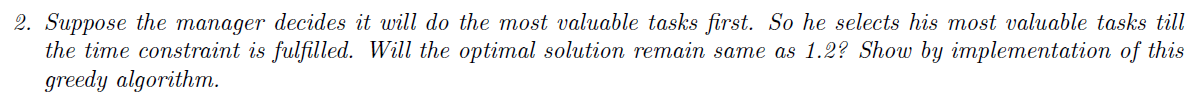

In [27]:
def taskgreedy(W, cost, value, n):
    max_profit = 0
    selected_items = []

    # Iterate while there's still capacity in the knapsack
    while W > 0:
        max_value = 0
        max_index = -1

        # Find the item with the maximum value
        for i in range(n):
          if (i not in selected_items):
            if cost[i] <= W and value[i] > max_value:
                max_value = value[i]
                max_index = i

        # If no more items can be added, break
        if max_index == -1:
            break

        # Add the item to the knapsack
        max_profit += max_value
        W -= cost[max_index]
        selected_items.append(max_index)


    #sorting items
    selected_items.sort()
    for i in range(len(selected_items)):
      selected_items[i] += 1
    return max_profit, selected_items


In [28]:
time4 = time.time()
max_value, selected_items = taskgreedy(2400, cost, value, len(cost))
print("Maximum Profit:", max_value)
print("Tasks that need to be taken (in the nomenclature of problem) are: ", selected_items)
time4 = time.time() - time4

Maximum Profit: 568
Tasks that need to be taken (in the nomenclature of problem) are:  [4, 6, 7, 8, 12, 14, 15, 17, 18, 19, 20]


In [30]:
print("Total value gained by tasks chosen is: ", max_value)

Total value gained by tasks chosen is:  568


This solution is different and not optimal as max value is 568. This also does not choose 3, 9, 10 instead choosed different task maybe becuase it thought there value was max, but their cost was also more.

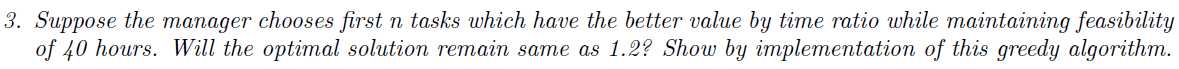

In [38]:
def taskgreedy2(W, cost, value, n):
    # Calculate value per unit weight for each item
    value_per_weight = [(value[i] / cost[i], i) for i in range(n)]
    # Sort items based on valueue per unit weight in descending order
    value_per_weight.sort(reverse=True, key=lambda x: x[0])

    max_profit = 0
    selected_items = []


    # Iterate while there's still capacity in the knapsack
    for ratio, index in value_per_weight:
        if W >= cost[index]:
            max_profit += value[index]
            W -= cost[index]
            selected_items.append(index)

    for i in range(len(selected_items)):
      selected_items[i] += 1
    return max_profit, selected_items

In [39]:
time5 = time.time()
max_value, selected_items = taskgreedy2(2400, cost, value, len(cost))
print("Maximum Profit:", max_value)
print("Tasks that need to be taken (in the nomenclature of problem) are: ", selected_items)
time5 = time.time() - time5

Maximum Profit: 601
Tasks that need to be taken (in the nomenclature of problem) are:  [9, 4, 6, 7, 15, 14, 8, 10, 19, 17, 3, 11, 16, 2, 12]


In [41]:
print("Tasks that need to be taken (in the nomenclature of problem) are: ", sorted(selected_items))

Tasks that need to be taken (in the nomenclature of problem) are:  [2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19]


This again gives better solution than greedy normal but still is not optimal as optimal is 623. Here our value gained is 601. Task that need to be taken [2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19]

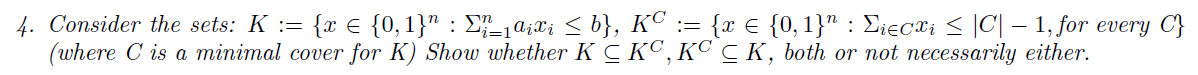